In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('lr_data.npy')
data.shape

(25, 2)

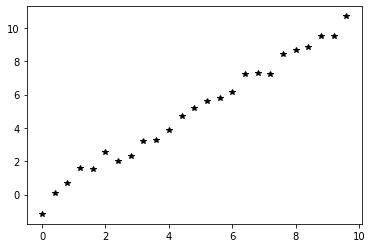

In [3]:
plt.plot(data[:,0], data[:,1], 'k*')
plt.show()

In [4]:
xdata = data[:,0]
ydata = data[:,1]
train_x =np.array([ np.array([1, x]) for x in xdata])
train_x.shape


(25, 2)

In [5]:
class linear_model:
    def __init__(self, input_data, target_data): #input_data, target_data는 모두 numpy array
        self.xdata = input_data
        self.ydata = target_data
        self.input_dim = self.xdata.shape[1]
        self.weights = np.zeros(self.input_dim)
        self.N = self.xdata.shape[0]
        
    def forward(self, x):
        return np.dot(self.weights, x)
    
    def loss(self):
        out = np.dot(self.xdata, self.weights)
        mse = np.sum((self.ydata - out)**2)/(2*self.N)
        return mse
    
    def loss2(self):
        mse = 0
        for i,x in enumerate(self.xdata):
            mse+= (self.ydata[i]-self.forward(x))**2
        return mse/(2*self.N)
    
    def visualize(self):
        assert self.input_dim == 2
        if self.weights[0] >=0:
            print("회귀직선 y=%.3f x +%.3f " %(self.weights[1], self.weights[0]))
        else:
            print("회귀직선 y=%.3f x %.3f " %(self.weights[1], self.weights[0]))
            
        plt.figure(figsize=(6,6))
        xx = self.xdata[:,1]
        yy = self.ydata
        plt.plot(xx, yy, 'r*')
        line_x = np.linspace(np.min(xx), np.max(xx), 300)
        line_y = np.array([self.forward(np.array([1,x])) for x in line_x])
        plt.plot(line_x, line_y, 'k--')
        return plt.show()
        

In [6]:
model1 = linear_model(train_x, ydata)

In [7]:
model1.loss()

17.794471292652176

In [8]:
model1.loss2()

17.794471292652176

회귀직선 y=0.000 x +0.000 


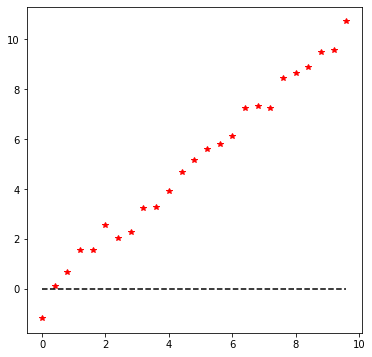

In [9]:
model1.visualize()

In [10]:
class trainer:
    def __init__(self, model, lr):
        self.model = model
        self.lr    = lr
        self.loss_history = [self.model.loss()]
        
    def grad(self):
        out = np.zeros(self.model.input_dim)
        for i in range(len(self.model.xdata)):
            out += (self.model.ydata[i] - self.model.forward(self.model.xdata[i])) \
                    *self.model.xdata[i]
        return -out/(2*self.model.N)
    
    def train(self, iteration):
        for i in range(iteration):
            self.model.weights -= self.lr * self.grad()
            self.loss_history += [self.model.loss()]
            print("%d-번째 경사하강법 적용시 손실은 %.4f" \
                  %(len(self.loss_history)-1, self.loss_history[-1]))
        plt.plot(self.loss_history, 'r-')
        return plt.show()
        
        
        
        

In [11]:
mse_trainer = trainer(model1, 0.05)

1-번째 경사하강법 적용시 손실은 0.7880
2-번째 경사하강법 적용시 손실은 0.1243
3-번째 경사하강법 적용시 손실은 0.0980
4-번째 경사하강법 적용시 손실은 0.0964
5-번째 경사하강법 적용시 손실은 0.0959
6-번째 경사하강법 적용시 손실은 0.0954
7-번째 경사하강법 적용시 손실은 0.0949
8-번째 경사하강법 적용시 손실은 0.0944
9-번째 경사하강법 적용시 손실은 0.0940
10-번째 경사하강법 적용시 손실은 0.0935
11-번째 경사하강법 적용시 손실은 0.0930
12-번째 경사하강법 적용시 손실은 0.0926
13-번째 경사하강법 적용시 손실은 0.0921
14-번째 경사하강법 적용시 손실은 0.0917
15-번째 경사하강법 적용시 손실은 0.0912
16-번째 경사하강법 적용시 손실은 0.0908
17-번째 경사하강법 적용시 손실은 0.0904
18-번째 경사하강법 적용시 손실은 0.0900
19-번째 경사하강법 적용시 손실은 0.0895
20-번째 경사하강법 적용시 손실은 0.0891
21-번째 경사하강법 적용시 손실은 0.0887
22-번째 경사하강법 적용시 손실은 0.0883
23-번째 경사하강법 적용시 손실은 0.0879
24-번째 경사하강법 적용시 손실은 0.0875
25-번째 경사하강법 적용시 손실은 0.0872
26-번째 경사하강법 적용시 손실은 0.0868
27-번째 경사하강법 적용시 손실은 0.0864
28-번째 경사하강법 적용시 손실은 0.0860
29-번째 경사하강법 적용시 손실은 0.0857
30-번째 경사하강법 적용시 손실은 0.0853
31-번째 경사하강법 적용시 손실은 0.0850
32-번째 경사하강법 적용시 손실은 0.0846
33-번째 경사하강법 적용시 손실은 0.0843
34-번째 경사하강법 적용시 손실은 0.0839
35-번째 경사하강법 적용시 손실은 0.0836
36-번째 경사하강법 적용시 손실은 0.0832
37-번째 경사하강법 적용시 손실은 0.0829
38-번째 경사하강

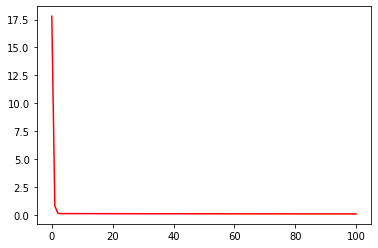

In [12]:
mse_trainer.train(100)

회귀직선 y=1.079 x -0.105 


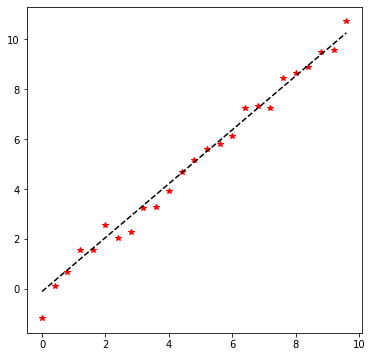

In [13]:
model1.visualize()